## Optimizing Air Travel: A Data-Driven Approach to Flight Delay Analysis and Prediction
### Importing Essential Libraries

We are using NumPy to work with numbers and Pandas to read and manage data in table format.

In [2]:
import numpy as np
import pandas as pd




We loaded the airline delay data from a CSV file into a DataFrame named airline_df and used .head() to see the first few rows of the dataset. This helps us get a quick look at the data and its columns.

In [3]:
airline_df= pd.read_csv("Airline_Delay_Cause.csv")
airline_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


# Data preprocessing
We first created a backup of the original dataset (dff_backup) so we can go back to the untouched data if needed. Then, we removed the columns year, carrier_name, and airport_name from the main DataFrame as they are not needed for our analysis.

In [4]:
dff_backup = airline_df.copy()

airline_df.drop(['year','carrier_name','airport_name'],axis = 1,inplace = True)
airline_df

,month,carrier,airport,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12,9E,ABE,72.0,5.0,2.46,1.00,0.73,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,12,9E,AEX,62.0,7.0,4.25,0.00,1.00,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,12,9E,AGS,95.0,10.0,5.94,0.00,1.06,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,12,9E,ALB,23.0,2.0,0.56,0.00,0.00,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,12,9E,ATL,2111.0,256.0,76.88,8.75,52.43,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,1,WN,ONT,892.0,184.0,59.21,2.61,22.41,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0
179334,1,WN,ORF,151.0,45.0,18.00,2.01,7.19,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0
179335,1,WN,PBI,251.0,68.0,25.17,0.08,14.92,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0
179336,1,WN,PDX,793.0,173.0,64.00,1.27,21.12,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0


In [5]:
print(dff_backup['airport'])

0         ABE
1         AEX
2         AGS
3         ALB
4         ATL
         ... 
179333    ONT
179334    ORF
179335    PBI
179336    PDX
179337    PHL
Name: airport, Length: 179338, dtype: object


We replaced the carrier and airport columns with their frequency counts in new columns named carrier_encoded and airport_encoded. This helps the model understand how often each carrier or airport appears, which can be useful for prediction.

In [6]:
airline_df['carrier_encoded'] = airline_df['carrier'].map(airline_df['carrier'].value_counts())
airline_df['airport_encoded'] = airline_df['airport'].map(airline_df['airport'].value_counts())                                                       
airline_df['carrier'].value_counts()


carrier
OO    23821
DL    14980
MQ    11299
AA    10912
UA    10418
WN    10051
EV     8793
G4     8761
F9     8307
AS     7754
9E     7494
YV     6877
B6     6827
OH     6545
YX     6072
NK     4950
ZW     4468
PT     4160
G7     3948
C5     3430
QX     3203
HA     1952
AX     1932
CP      926
VX      821
US      434
EM      144
KS       44
9K       15
Name: count, dtype: int64

After creating the encoded versions, we removed the original carrier and airport columns, as they are no longer needed for model training.

In [7]:
airline_df.drop(['carrier','airport'],axis = 1,inplace=True)
airline_df

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_encoded,airport_encoded
0,12,72.0,5.0,2.46,1.00,0.73,0.00,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,7494,563
1,12,62.0,7.0,4.25,0.00,1.00,0.00,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,7494,274
2,12,95.0,10.0,5.94,0.00,1.06,0.00,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,7494,448
3,12,23.0,2.0,0.56,0.00,0.00,0.00,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,7494,1290
4,12,2111.0,256.0,76.88,8.75,52.43,0.00,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,7494,1413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179333,1,892.0,184.0,59.21,2.61,22.41,0.98,98.79,3.0,2.0,8431.0,2661.0,123.0,1029.0,92.0,4526.0,10051,890
179334,1,151.0,45.0,18.00,2.01,7.19,0.00,17.80,0.0,0.0,2391.0,840.0,295.0,301.0,0.0,955.0,10051,1330
179335,1,251.0,68.0,25.17,0.08,14.92,0.00,27.83,6.0,0.0,3405.0,1003.0,9.0,534.0,0.0,1859.0,10051,955
179336,1,793.0,173.0,64.00,1.27,21.12,0.00,86.60,0.0,1.0,7479.0,2370.0,143.0,689.0,0.0,4277.0,10051,1254


We checked if there are any missing (null) values in the dataset. This helps ensure the data is clean before we move forward with analysis or modeling.

In [8]:
airline_df.isnull().sum()

month                    0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
carrier_encoded          0
airport_encoded          0
dtype: int64

We checked how many rows have any missing values and whether those missing values occur in the same rows across all columns:

In [9]:

missing_rows_mask = airline_df.isnull().all(axis=1)  
rows_with_missing = airline_df[airline_df.isnull().any(axis=1)]
print(f"Total rows with any missing values: {rows_with_missing.shape[0]}")
missing_index_sets = [set(airline_df[airline_df[col].isnull()].index) for col in airline_df.columns if airline_df[col].isnull().sum() > 0]
all_same = all(missing_index_sets[0] == s for s in missing_index_sets[1:])
print(f"All missing values in same rows? {all_same}")


Total rows with any missing values: 591
All missing values in same rows? False


# ->
We found the exact rows that have missing values in all the columns that contain missing data.
This helps us confirm whether the missing values are overlapping across columns, making it easier to decide whether to drop or impute those rows.

In [10]:
missing_indices = {
    col: set(airline_df[airline_df[col].isnull()].index)
    for col in airline_df.columns
    if airline_df[col].isnull().sum() > 0
}
common_missing_rows = set.intersection(*missing_indices.values())

print(f"Rows with missing values in ALL affected columns: {len(common_missing_rows)}")


Rows with missing values in ALL affected columns: 341


# ->
We identified which columns have missing data, then found the rows where all those columns are missing values.
Finally, we dropped those specific rows from the dataset to ensure cleaner and more reliable data for analysis and modeling.

In [11]:

missing_cols = [col for col in airline_df.columns if airline_df[col].isnull().sum() > 0]

missing_indices = {
    col: set(airline_df[airline_df[col].isnull()].index)
    for col in missing_cols
}

common_missing_rows = set.intersection(*missing_indices.values())
print(len(common_missing_rows))
airline_df = airline_df.drop(index=common_missing_rows)


341


# ->
We filled the missing values in the arr_del15 column using its median value.
This is a common technique to handle missing data without adding bias, especially when the column contains numeric values with possible outliers.

In [12]:
airline_df['arr_del15'].fillna(airline_df['arr_del15'].median(), inplace=True)

# ->
We ran a final check to make sure all missing values have been handled and the dataset is now clean and ready for analysis or modeling.

In [13]:
airline_df.isnull().sum()

month                  0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
carrier_encoded        0
airport_encoded        0
dtype: int64

# ->
We viewed the basic statistics of the arr_del15 column to understand its distribution,This helps us understand the spread and central tendency of delay indicators in the dataset.

In [14]:
airline_df['arr_del15'].describe()

count    178997.000000
mean         58.648039
std         164.271313
min           0.000000
25%           6.000000
50%          15.000000
75%          40.000000
max        4176.000000
Name: arr_del15, dtype: float64

# ->
We used the Z-score method to find outliers in the arr_delay column.
A Z-score greater than 3 indicates values that are unusually far from the mean.
This helps identify extreme delay values that might affect model performance or skew analysis.


In [15]:
from scipy import stats


z_scores = np.abs(stats.zscore(airline_df['arr_delay']))
outlier_indices = np.where(z_scores > 3)[0]
print(f"Number of outliers by Z-score: {len(outlier_indices)}")


Number of outliers by Z-score: 3312


# ->
We brought back the original airport column from the backup DataFrame (dff_backup).
This is needed for further analysis or visualizations involving airport names.

In [16]:
airline_df['airport'] = dff_backup['airport']
airline_df['carrier'] = dff_backup['carrier']

This step filters the main DataFrame to include only rows where the airport code is 'YNG'.

In [17]:
yng_info = airline_df[airline_df['airport'] == 'YNG']
yng_info

,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_encoded,airport_encoded,airport,carrier
139936,1,2.0,2.0,1.39,0.0,0.61,0.0,0.0,0.0,0.0,119.0,97.0,0.0,22.0,0.0,0.0,8761,1,YNG,G4


Remove the row where airport is 'YNG'

In [18]:
# Remove the row where airport is 'YNG'
airline_df = airline_df[airline_df['airport'] != 'YNG']
airline_df = airline_df.reset_index(drop=True)

# ->
We defined a function to handle outliers using the IQR method, but applied it separately within each airport group.
For each column in columns_to_cap, extreme values beyond 1.5×IQR from the quartiles were clipped to reduce their impact.
This helps preserve airport-specific data patterns while making the dataset more robust and less sensitive to extreme values.

In [19]:
def cap_outliers_groupwise(df, columns, group_col):
    df_capped = df.copy()
    for col in columns:
        def cap_iqr(group):
            Q1 = group[col].quantile(0.25)
            Q3 = group[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group[col] = group[col].clip(lower, upper)
            return group
        df_capped = df_capped.groupby(group_col, group_keys=False).apply(cap_iqr)
    return df_capped

columns_to_cap = [
    'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct',
    'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
    'arr_flights', 'arr_del15', 'arr_cancelled', 'arr_diverted','arr_delay'
]

df_cleaned = cap_outliers_groupwise(airline_df, columns_to_cap, group_col='airport')


# ->
We calculated a new column called OAI (Overall Airport Impact) using a weighted formula.
This score combines different types of delays, giving more weight to carrier and late aircraft delays, which usually have a bigger impact on overall performance.

In [20]:
df_cleaned['OAI'] = (
    airline_df['carrier_delay'] * 0.5 +
    airline_df['late_aircraft_ct'] * 0.3 +
    airline_df['weather_delay'] * 0.1 +
    airline_df['nas_delay'] * 0.1 +
    airline_df['arr_cancelled'] * 0.1
)


# Exploratory Data Analysis
analyzes airport delay risks. It aggregates data by airport, creates a delay risk label, prepares features for classification, and shows basic stats like the number of airports and high-risk cases. It ends by generating visualizations to support interpretation.

SIMPLE AIRPORT DELAY CLASSIFICATION
1. Creating airport-level aggregated data...
2. Creating classification target...

Using Thresholds:
Delay rate > 18.5%
Average delay > 323.9 min
Cancellation rate > 2.6%
3. Preparing features...

Dataset Info:
Number of airports: 392
High delay risk airports: 113 (28.8%)

5. Creating visualizations...


/var/folders/pq/590wdxhn5y555rym6t4k1km80000gn/T/ipykernel_6150/885449633.py:106: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_by_size = airport_df.groupby('airport_size')['high_delay_risk'].mean()


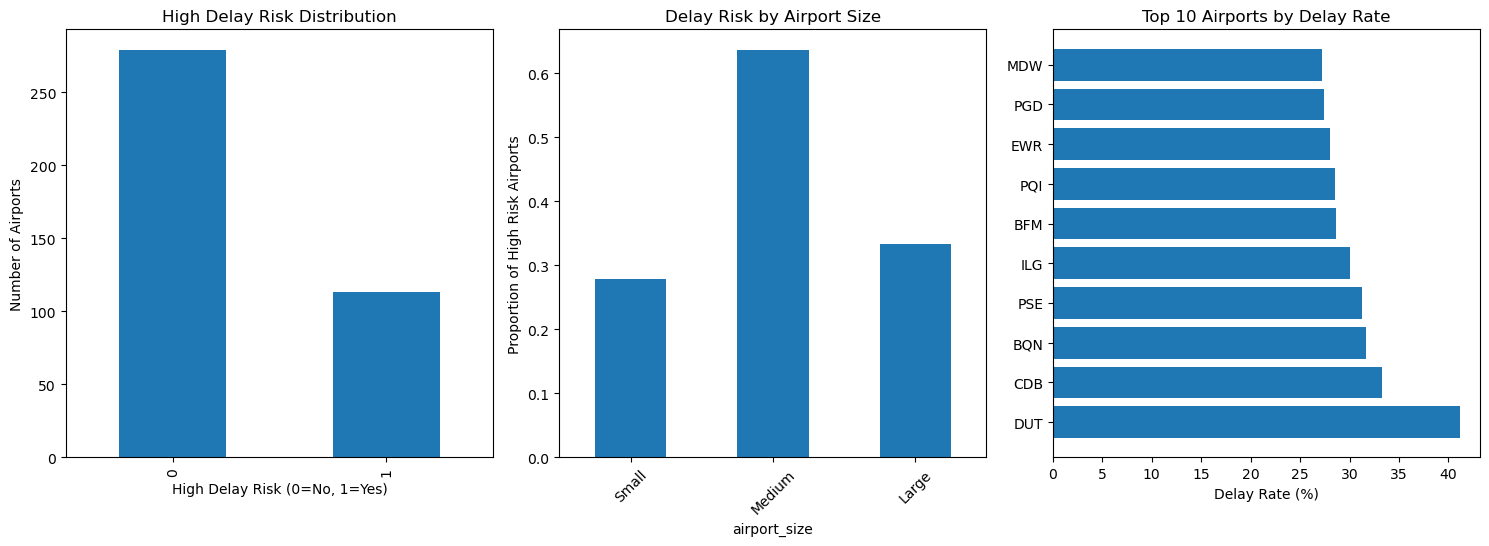


PRACTICAL INSIGHTS FOR TRAVELERS:
HIGH RISK AIRPORTS (113 airports):
• Average delay rate: 18.6%
• Average delay time: 627.7 minutes
• Average cancellation rate: 3.3%

LOW RISK AIRPORTS (279 airports):
• Average delay rate: 16.0%
• Average delay time: 359.7 minutes
• Average cancellation rate: 1.4%

TOP 5 MOST PROBLEMATIC AIRPORTS:
DUT: 41.1% delays, 381 min avg, 13.6% cancelled
CDB: 33.3% delays, 23 min avg, 3.3% cancelled
ILG: 30.0% delays, 52 min avg, 3.6% cancelled
BFM: 28.7% delays, 51 min avg, 4.7% cancelled
PQI: 28.5% delays, 241 min avg, 6.8% cancelled

TOP 5 MOST RELIABLE AIRPORTS:
FNL: 0.0% delays, 0 min avg, 0.0% cancelled
ROP: 6.6% delays, 10 min avg, 0.0% cancelled
EKO: 7.2% delays, 86 min avg, 0.0% cancelled
SPN: 7.2% delays, 49 min avg, 0.0% cancelled
BTM: 7.4% delays, 105 min avg, 0.8% cancelled


In [32]:

import matplotlib.pyplot as plt

def create_airport_summary(df):
    airport_stats = df.groupby('airport').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'OAI': ['mean', 'std', 'max', 'median'],
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)
    
    # Flatten column names
    airport_stats.columns = ['_'.join(col).strip() if col[1] else col[0] 
                           for col in airport_stats.columns]
    
    # Calculate key metrics that travelers care about
    airport_stats['delay_rate'] = (airport_stats['arr_del15_sum'] / 
                                 airport_stats['arr_flights_sum'] * 100).round(2)
    
    airport_stats['cancellation_rate'] = (airport_stats['arr_cancelled_sum'] / 
                                        airport_stats['arr_flights_sum'] * 100).round(2)
    
    airport_stats['avg_delay_minutes'] = airport_stats['OAI_mean']
    airport_stats['delay_variability'] = airport_stats['OAI_std']
    airport_stats['worst_delay'] = airport_stats['OAI_max']
    airport_stats['controlable_median_delay_minutes'] = airport_stats['OAI_median']
    
    # Create categorical features
    airport_stats['airport_size'] = pd.cut(airport_stats['arr_flights_sum'], 
                                         bins=3, labels=['Small', 'Medium', 'Large'])
    
    # Reset index to make airport a column
    airport_stats = airport_stats.reset_index()
    
    return airport_stats

def create_classification_target(airport_df):

    delay_rate_threshold = airport_df['delay_rate'].quantile(0.75)  # Top 25%
    avg_delay_threshold = airport_df['avg_delay_minutes'].quantile(0.75)  # Top 25%
    cancellation_threshold = airport_df['cancellation_rate'].quantile(0.80)  # Top 20%
    
    print(f"\nUsing Thresholds:")
    print(f"Delay rate > {delay_rate_threshold:.1f}%")
    print(f"Average delay > {avg_delay_threshold:.1f} min")
    print(f"Cancellation rate > {cancellation_threshold:.1f}%")

    high_delay_condition = (
        (airport_df['delay_rate'] > delay_rate_threshold) &
        (airport_df['avg_delay_minutes'] > avg_delay_threshold)
    ) | (
        airport_df['cancellation_rate'] > cancellation_threshold
    )
    
    airport_df['high_delay_risk'] = high_delay_condition.astype(int)
    return airport_df


# 3. PREPARE FEATURES FOR CLASSIFICATION
def prepare_classification_features(airport_df):
    """
    Select and prepare features for classification
    """
    
    # Select meaningful features for classification
    feature_columns = [
        'arr_flights_sum',      # Airport traffic volume
        'avg_delay_minutes',    # Average delay
        'delay_variability',    # Delay consistency
        'carrier_delay_mean',   # Carrier-related delays
        'weather_delay_mean',   # Weather-related delays
        'nas_delay_mean',       # Air traffic system delays
        'cancellation_rate'     # Cancellation rate
    ]
    
    X = airport_df[feature_columns].copy()
    y = airport_df['high_delay_risk'].copy()
    
    # Handle any missing values
    X = X.fillna(X.mean())
    
    return X, y, feature_columns


def visualize_results(airport_df):
#results
    """
    Create simple visualizations
    """
    
    plt.figure(figsize=(15, 10))
    
    # 1. Target distribution
    plt.subplot(2, 3, 1)
    airport_df['high_delay_risk'].value_counts().plot(kind='bar')
    plt.title('High Delay Risk Distribution')
    plt.xlabel('High Delay Risk (0=No, 1=Yes)')
    plt.ylabel('Number of Airports')

    plt.subplot(2, 3, 2)
    risk_by_size = airport_df.groupby('airport_size')['high_delay_risk'].mean()
    risk_by_size.plot(kind='bar')
    plt.title('Delay Risk by Airport Size')
    plt.ylabel('Proportion of High Risk Airports')
    plt.xticks(rotation=45)
    
    # 6. Top 10 highest risk airports
    plt.subplot(2, 3, 3)
    top_risk = airport_df.nlargest(10, 'delay_rate')
    plt.barh(range(len(top_risk)), top_risk['delay_rate'])
    plt.yticks(range(len(top_risk)), top_risk['airport'])
    plt.xlabel('Delay Rate (%)')
    plt.title('Top 10 Airports by Delay Rate')
    
    plt.tight_layout()
    plt.show()

# ============================================================================
# 6. MAIN EXECUTION
# ============================================================================

def main_classification_analysis(df):  
    print("SIMPLE AIRPORT DELAY CLASSIFICATION")
    # Step 1: Create aggregated dataset
    print("1. Creating airport-level aggregated data...")
    airport_df = create_airport_summary(df)
    
    # Step 2: Create classification target
    print("2. Creating classification target...")
    airport_df = create_classification_target(airport_df)
    
    # Step 3: Prepare features
    print("3. Preparing features...")
    X, y, feature_names = prepare_classification_features(airport_df)
    
    print(f"\nDataset Info:")
    print(f"Number of airports: {len(airport_df)}")
    # print(f"Number of features: {len(feature_names)}")
    print(f"High delay risk airports: {y.sum()} ({y.mean()*100:.1f}%)")
    print("\n5. Creating visualizations...")
    visualize_results(airport_df)
    
    
    print("\nPRACTICAL INSIGHTS FOR TRAVELERS:")
    high_risk_airports = airport_df[airport_df['high_delay_risk'] == 1]
    low_risk_airports = airport_df[airport_df['high_delay_risk'] == 0]
    
    print(f"HIGH RISK AIRPORTS ({len(high_risk_airports)} airports):")
    print(f"• Average delay rate: {high_risk_airports['delay_rate'].mean():.1f}%")
    print(f"• Average delay time: {high_risk_airports['avg_delay_minutes'].mean():.1f} minutes")
    print(f"• Average cancellation rate: {high_risk_airports['cancellation_rate'].mean():.1f}%")
    
    print(f"\nLOW RISK AIRPORTS ({len(low_risk_airports)} airports):")
    print(f"• Average delay rate: {low_risk_airports['delay_rate'].mean():.1f}%")
    print(f"• Average delay time: {low_risk_airports['avg_delay_minutes'].mean():.1f} minutes")
    print(f"• Average cancellation rate: {low_risk_airports['cancellation_rate'].mean():.1f}%")
    
    # top 10 problematic airports
    print(f"\nTOP 5 MOST PROBLEMATIC AIRPORTS:")
    worst_airports = high_risk_airports.nlargest(5, 'delay_rate')[
        ['airport', 'delay_rate', 'avg_delay_minutes', 'cancellation_rate']
    ]
    for idx, row in worst_airports.iterrows():
        print(f"{row['airport']}: {row['delay_rate']:.1f}% delays, "
              f"{row['avg_delay_minutes']:.0f} min avg, "
              f"{row['cancellation_rate']:.1f}% cancelled")
    

    print(f"\nTOP 5 MOST RELIABLE AIRPORTS:")

    best_airports = low_risk_airports.nsmallest(5, 'delay_rate')[
        ['airport', 'delay_rate', 'avg_delay_minutes', 'cancellation_rate']
    ]
    for idx, row in best_airports.iterrows():
        print(f"{row['airport']}: {row['delay_rate']:.1f}% delays, "
              f"{row['avg_delay_minutes']:.0f} min avg, "
              f"{row['cancellation_rate']:.1f}% cancelled")
    
    return airport_df

airport_results = main_classification_analysis(df_cleaned)


summarizes the  flight data on a monthly basis and then generates visualizations to help understand trends or patterns in delays over time.

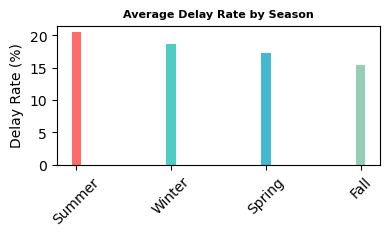

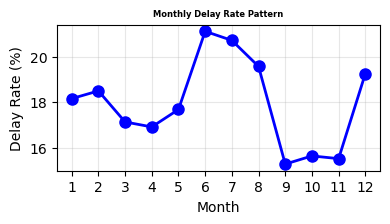

In [44]:
def create_monthly_summary(df):

    monthly_stats = df.groupby('month').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'OAI': ['mean', 'std', 'max', 'min'],
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)
    monthly_stats.columns = ['_'.join(col).strip() if col[1] else col[0] 
                           for col in monthly_stats.columns]
    monthly_stats['delay_rate'] = (monthly_stats['arr_del15_sum'] / 
                                 monthly_stats['arr_flights_sum'] * 100).round(2)
 
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'
    monthly_stats = monthly_stats.reset_index()
    monthly_stats['season'] = monthly_stats['month'].apply(get_season)

    return monthly_stats
    
plt.figure(figsize=(4, 6))  # Set width and height of the figure
plt.subplot(3, 1, 2)
seasonal_delays = monthly_df.groupby('season')['delay_rate'].mean().sort_values(ascending=False)
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4']
bars = plt.bar(seasonal_delays.index, seasonal_delays.values, color=colors, width=0.1) 
plt.title('Average Delay Rate by Season', fontsize=8, fontweight='bold', pad=6) 
plt.ylabel('Delay Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

plt.figure(figsize=(4, 6)) 
plt.subplot(3, 1, 1)
monthly_df_sorted = monthly_df.sort_values('month')
plt.plot(monthly_df_sorted['month'], monthly_df_sorted['delay_rate'], 'bo-', linewidth=2, markersize=8)
plt.title('Monthly Delay Rate Pattern', fontsize=6, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Delay Rate (%)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.tight_layout()  # Optional: improves spacing
plt.show()


monthly_df = create_monthly_summary(df_cleaned)



creates a summary of delay statistics for each airline carrier and then visualizes the results to compare performance across carriers

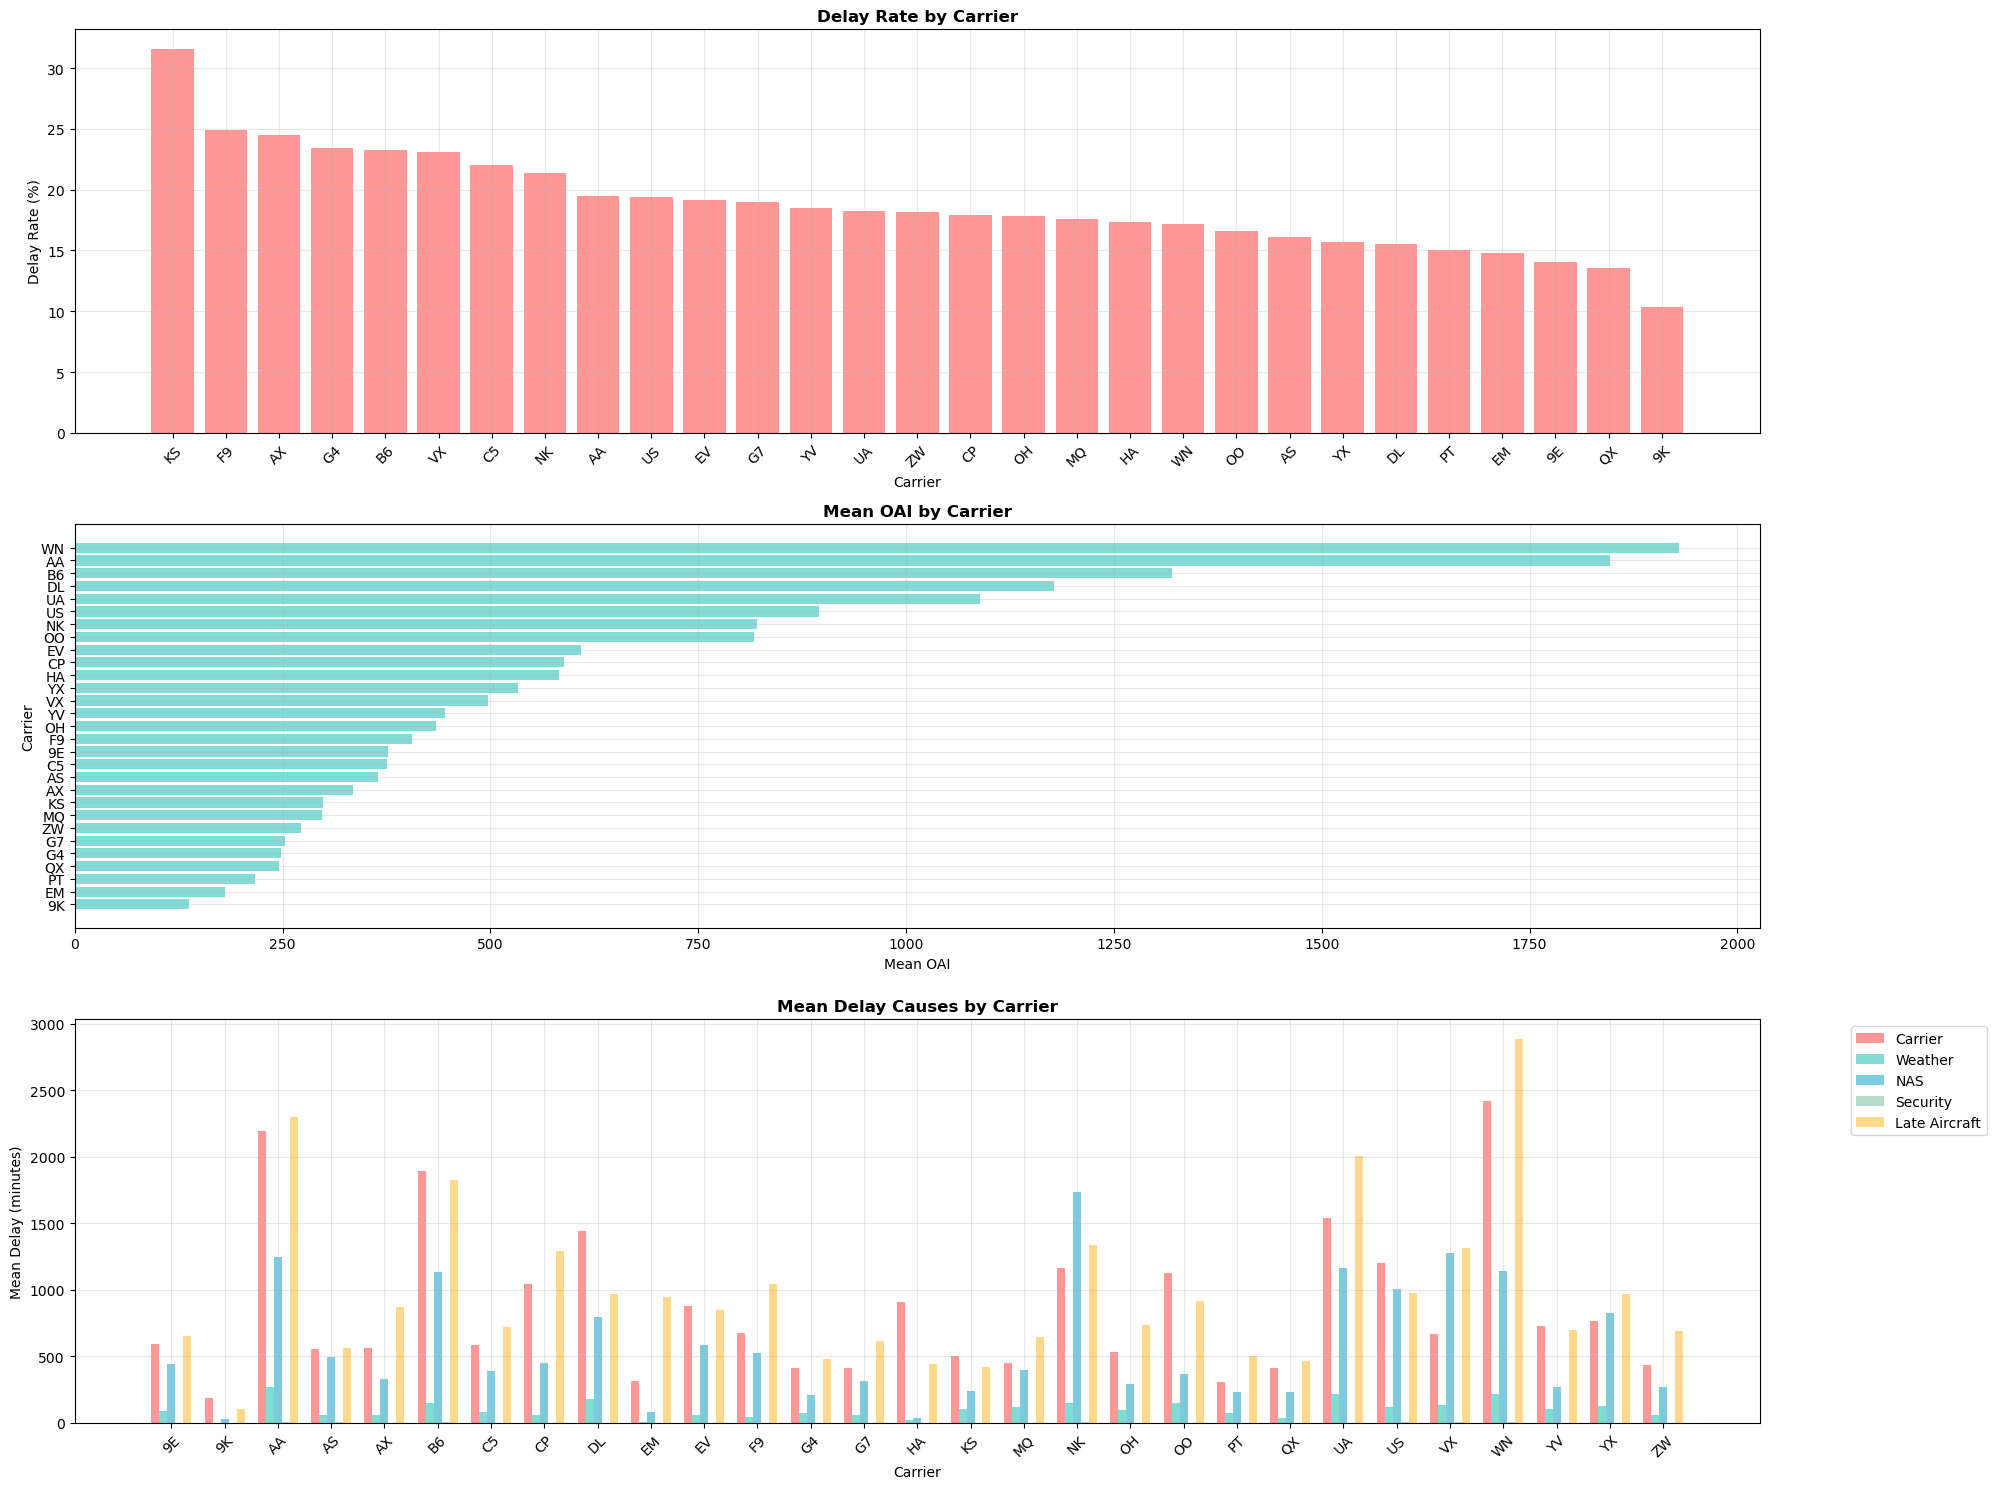

In [47]:
def create_carrier_summary(df):
    carrier_stats = df.groupby('carrier').agg({
        'arr_flights': 'sum',
        'arr_del15': 'sum',
        'arr_cancelled': 'sum',
        'arr_diverted': 'sum',
        'OAI': ['mean', 'std', 'max', 'min','median'],
        'carrier_delay': 'mean',
        'weather_delay': 'mean',
        'nas_delay': 'mean',
        'security_delay': 'mean',
        'late_aircraft_delay': 'mean'
    }).round(2)
    carrier_stats.columns = ['_'.join(col).strip() if col[1] else col[0] 
                           for col in carrier_stats.columns]
    carrier_stats['delay_rate'] = (carrier_stats['arr_del15_sum'] / 
                                 carrier_stats['arr_flights_sum'] * 100).round(2)
    carrier_stats['cancellation_rate'] = (carrier_stats['arr_cancelled_sum'] / 
                                      carrier_stats['arr_flights_sum'] * 100).round(2)
    carrier_stats['avg_delay_minutes'] = carrier_stats['OAI_mean']
    carrier_stats['delay_variability'] = carrier_stats['OAI_std']
    carrier_stats['worst_delay'] = carrier_stats['OAI_max']
    carrier_stats['controlable_median_delay_minutes'] = carrier_stats['OAI_median']

    carrier_stats = carrier_stats.reset_index()
    return carrier_stats

def create_carrier_visualizations(carrier_df):
    """
    Create visualizations for the carrier analysis
    """
    
    plt.figure(figsize=(20, 15))
    
    # 1. Delay rate by carrier (sorted highest to lowest)
    plt.subplot(3, 1, 1)
    carrier_delay_sorted = carrier_df.sort_values('delay_rate', ascending=False)
    bars = plt.bar(carrier_delay_sorted['carrier'], carrier_delay_sorted['delay_rate'], 
                   color='#ff6b6b', alpha=0.7)
    plt.title('Delay Rate by Carrier', fontsize=12, fontweight='bold')
    plt.xlabel('Carrier')
    plt.ylabel('Delay Rate (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
 

    
    # 2. Mean OAI per carrier (vertical bar chart)
    plt.subplot(3, 1,2)
    carrier_oai_sorted = carrier_df.sort_values('OAI_mean', ascending=True)
    plt.barh(carrier_oai_sorted['carrier'], carrier_oai_sorted['OAI_mean'], 
             color='#4ecdc4', alpha=0.7)
    plt.title('Mean OAI by Carrier', fontsize=12, fontweight='bold')
    plt.xlabel('Mean OAI')
    plt.ylabel('Carrier')
    plt.grid(True, alpha=0.3)
    
    # 3. Delay causes comparison by carrier (grouped bar chart)
    plt.subplot(3, 1,3)
    delay_columns = ['carrier_delay_mean', 'weather_delay_mean', 'nas_delay_mean', 
                     'security_delay_mean', 'late_aircraft_delay_mean']
    delay_labels = ['Carrier', 'Weather', 'NAS', 'Security', 'Late Aircraft']
    
    x = range(len(carrier_df))
    width = 0.15
    colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#96ceb4', '#feca57']
    
    for i, (col, label, color) in enumerate(zip(delay_columns, delay_labels, colors)):
        plt.bar([pos + width * i for pos in x], carrier_df[col], 
                width, label=label, color=color, alpha=0.7)
    
    plt.title('Mean Delay Causes by Carrier', fontsize=12, fontweight='bold')
    plt.xlabel('Carrier')
    plt.ylabel('Mean Delay (minutes)')
    plt.xticks([pos + width * 2 for pos in x], carrier_df['carrier'], rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Execute the analysis
carrier_df = create_carrier_summary(df_cleaned)
create_carrier_visualizations(carrier_df)

calculates the delay rate for each record by dividing delayed arrivals by total arrivals, then flags records with a delay rate over 15% as high delay (1) or not (0)


In [24]:
airline_df['delay_rate'] = airline_df['arr_del15']/airline_df['arr_flights']
airline_df['is_delay'] = (airline_df['delay_rate']>.15).astype(int)
airline_df['delay_rate'].describe()



count    178996.000000
mean          0.190482
std           0.372196
min           0.000000
25%           0.105263
50%           0.166667
75%           0.238095
max          15.000000
Name: delay_rate, dtype: float64

# ->Building a Classification Model to Predict Delays
We trained an XGBoost Classifier to predict whether a flight is delayed (is_delayed) based on features present in dataset

Data was split into training and test sets (80/20 split), with stratification to preserve class balance.
The model was evaluated using F1 Score (balance between precision & recall) and F2 Score (gives more weight to recall, which is useful when missing delays is costlier).
We also printed a full classification report to analyze precision, recall, and F1 score for both classes.
These metrics help assess how well the model detects delays, especially under imbalanced conditions.

In [25]:
from sklearn.model_selection  import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, fbeta_score, classification_report
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, fbeta_score, classification_report

important_features = [
    'month',
    'arr_flights',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'late_aircraft_ct',
    'arr_cancelled',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'carrier_encoded',
    'airport_encoded',]

X_clf_reduced = airline_df[important_features]
y_clf=  airline_df['is_delay']

X_clf_train_red, X_clf_test_red, y_clf_train_red, y_clf_test_red = train_test_split(
    X_clf_reduced, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)
clf_model = XGBClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    colsample_bytree=0.8,
    reg_alpha=5,
    reg_lambda=10,
    random_state=42
)



clf_model.fit(X_clf_train_red, y_clf_train_red)
y_pred = clf_model.predict(X_clf_test_red)
# Print model performance metrics
print(f"F1 Score: {f1_score(y_clf_test_red, y_pred):.4f}")
print(f"F2 Score: {fbeta_score(y_clf_test_red, y_pred, beta=2):.4f}")
print("\nClassification Report:")
print(classification_report(y_clf_test_red, y_pred))

# Print feature importance
print("\nKey risk factors in order of importance:")
feature_importance = [(feature, importance) for feature, importance in 
                     zip(important_features, clf_model.feature_importances_)]
feature_importance.sort(key=lambda x: x[1], reverse=True)

importance_descriptions = {
    'month': 'Seasonal trends and demand patterns',
    'arr_flights': 'Total number of flights scheduled',
    'carrier_ct': 'Count of carrier-specific delay events',
    'weather_ct': 'Count of weather-related delay events',
    'nas_ct': 'Count of NAS (airspace) delay events',
    'late_aircraft_ct': 'Count of late aircraft delay events',
    'arr_cancelled': 'Number of cancelled flights',
    'carrier_delay': 'Delay minutes attributed to carrier',
    'weather_delay': 'Delay minutes due to weather',
    'nas_delay': 'Delay minutes due to NAS (airspace) issues',
    'late_aircraft_delay': 'Delay minutes due to late incoming aircraft',
    'carrier_encoded': 'Numerical encoding of carrier',
    'airport_encoded': 'Numerical encoding of airport'
 }


for i, (feature, importance) in enumerate(feature_importance, 1):
    percentage = importance * 100
    description = importance_descriptions.get(feature, 'Airport operational metric')
    print(f"{i}. {feature.replace('_', ' ').title()} ({percentage:.1f}%) - {description}")


F1 Score: 0.8408
F2 Score: 0.8710

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.76     15402
           1       0.79      0.89      0.84     20398

    accuracy                           0.81     35800
   macro avg       0.81      0.79      0.80     35800
weighted avg       0.81      0.81      0.80     35800


Key risk factors in order of importance:
1. Late Aircraft Ct (29.3%) - Count of late aircraft delay events
2. Nas Ct (16.3%) - Count of NAS (airspace) delay events
3. Arr Flights (14.3%) - Total number of flights scheduled
4. Nas Delay (11.8%) - Delay minutes due to NAS (airspace) issues
5. Carrier Delay (9.0%) - Delay minutes attributed to carrier
6. Carrier Ct (7.3%) - Count of carrier-specific delay events
7. Month (4.0%) - Seasonal trends and demand patterns
8. Carrier Encoded (4.0%) - Numerical encoding of carrier
9. Arr Cancelled (2.4%) - Number of cancelled flights
10. Weather Delay (1.6%) - Delay mi

# ->Evaluating the Model with ROC Curve and AUC Score
We plotted the ROC Curve (Receiver Operating Characteristic) to evaluate how well the classifier separates delayed and non-delayed flights.

AUC Score: 0.8757


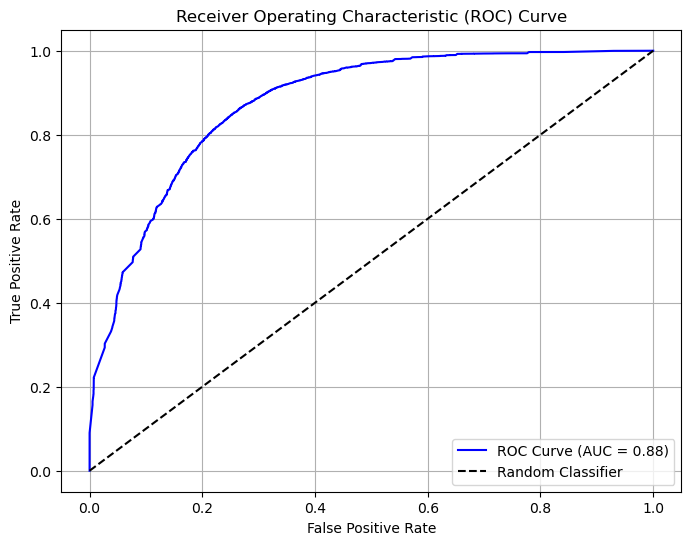

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class (delayed)
y_proba = clf_model.predict_proba(X_clf_test_red)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_clf_test_red, y_proba)
auc_score = roc_auc_score(y_clf_test_red, y_proba)
print(f"AUC Score: {auc_score:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# ->Interpreting the Model with SHAP (SHapley Additive exPlanations)
We used SHAP to understand how each feature influenced the model’s predictions

Shows the average absolute impact of each feature on model predictions.
Helps identify which features the model relied on most.

/var/folders/pq/590wdxhn5y555rym6t4k1km80000gn/T/ipykernel_6150/4219995996.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


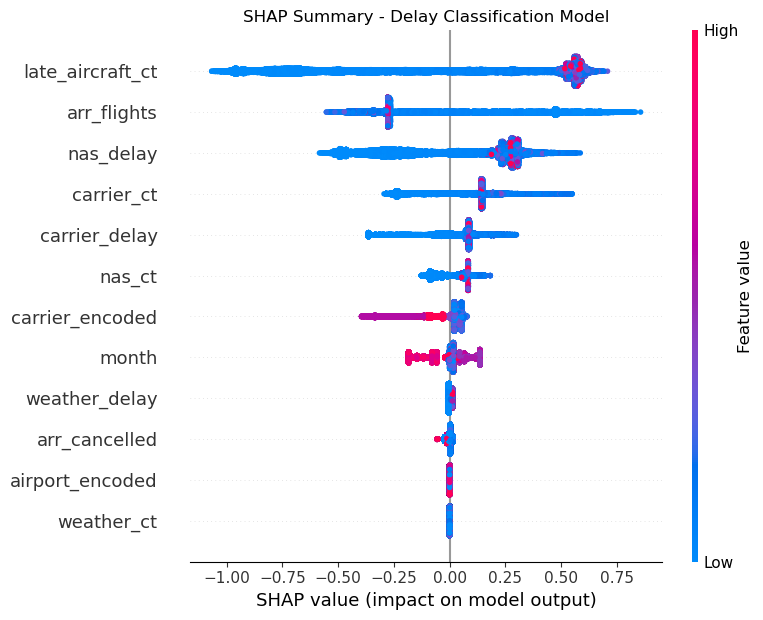

/var/folders/pq/590wdxhn5y555rym6t4k1km80000gn/T/ipykernel_6150/4219995996.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


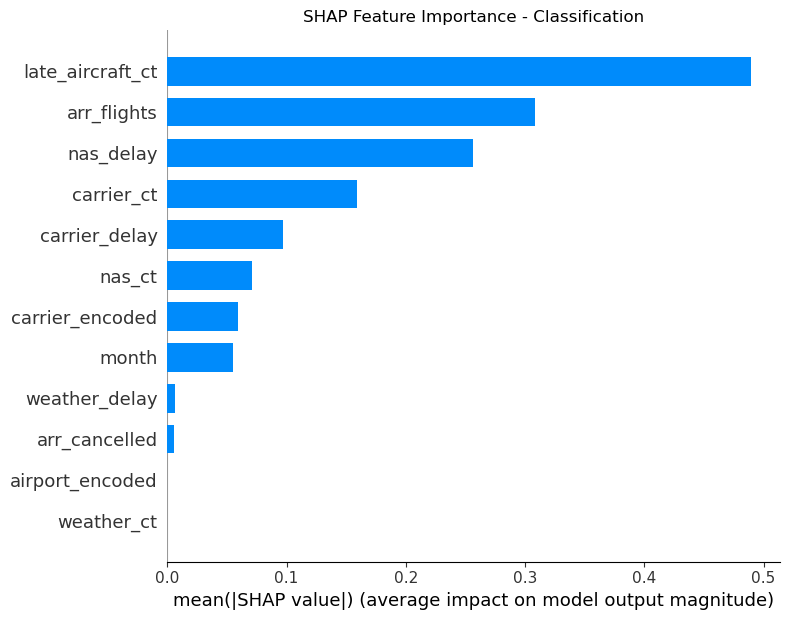

In [27]:
import shap
explainer_clf = shap.TreeExplainer(clf_model)
shap_values_clf = explainer_clf.shap_values(X_clf_test_red)  # For binary classification, this is usually a 2D array

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_clf, X_clf_test_red, feature_names=X_clf_test_red.columns, show=False)
plt.title('SHAP Summary - Delay Classification Model')
plt.tight_layout()
plt.show()

#
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_clf, X_clf_test_red, feature_names=X_clf_test_red.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Classification')
plt.tight_layout()
plt.show()


creates a new column called OAI (Overall Airport Index) by calculating a weighted sum of different types of delays and cancellations. It gives more importance to carrier delays and late aircraft issues, helping to summarize overall airport performance in a single score

In [28]:
df_cleaned['OAI'] = (
    airline_df['carrier_delay'] * 0.5 +
    airline_df['late_aircraft_ct'] * 0.3 +
    airline_df['weather_delay'] * 0.1 +
    airline_df['nas_delay'] * 0.1 +
    airline_df['arr_cancelled'] * 0.1
)

# ->Training a Regression Model to Predict OAI (Operational Adjustability Index)
We trained an XGBoost Regressor to predict the actual OAI value (delay impact in minutes) based on flight and airport features.
This regression model helps estimate the expected delay impact instead of just classifying delays.

In [29]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
important_featuress = [
    'month',
    'arr_flights',
    'carrier_ct',
    'weather_ct',
    'nas_ct',
    'late_aircraft_ct',
    'arr_cancelled',
    'carrier_delay',
    'weather_delay',
    'nas_delay',
    'carrier_encoded',
    'airport_encoded',
]

# Prepare training data
X_reg = df_cleaned[important_featuress]
y_reg = df_cleaned['OAI'] 

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)
reg_model = XGBRegressor(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    colsample_bytree=0.8,
    reg_alpha=5,
    reg_lambda=10,
    random_state=42
)

reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

# Print regression performance metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test_reg, y_pred_reg):.2f}")
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R^2 Score: {r2_score(y_test_reg, y_pred_reg):.4f}")
print("\nKey risk factors in order of importance:")
feature_importance = [(feature, importance) for feature, importance in 
                     zip(important_features, reg_model.feature_importances_)]
feature_importance.sort(key=lambda x: x[1], reverse=True)
importance_descriptions = {
    'month': 'Seasonal trends and demand patterns',
    'arr_flights': 'Total number of flights scheduled',
    'carrier_ct': 'Count of carrier-specific delay events',
    'weather_ct': 'Count of weather-related delay events',
    'nas_ct': 'Count of NAS (airspace) delay events',
    'late_aircraft_ct': 'Count of late aircraft delay events',
    'arr_cancelled': 'Number of cancelled flights',
    'carrier_delay': 'Delay minutes attributed to carrier',
    'weather_delay': 'Delay minutes due to weather',
    'nas_delay': 'Delay minutes due to NAS (airspace) issues',
    'late_aircraft_delay': 'Delay minutes due to late incoming aircraft',
    'carrier_encoded': 'Numerical encoding of carrier',
    'airport_encoded': 'Numerical encoding of airport'
}

for i, (feature, importance) in enumerate(feature_importance, 1):
    percentage = importance * 100
    description = importance_descriptions.get(feature, 'Airport operational metric')
    print(f"{i}. {feature.replace('_', ' ').title()} ({percentage:.1f}%) - {description}")


Mean Absolute Error: 245.59
Root Mean Squared Error: 1091.29
R^2 Score: 0.7834

Key risk factors in order of importance:
1. Carrier Delay (34.6%) - Delay minutes attributed to carrier
2. Carrier Ct (21.4%) - Count of carrier-specific delay events
3. Late Aircraft Ct (9.9%) - Count of late aircraft delay events
4. Carrier Encoded (8.3%) - Numerical encoding of carrier
5. Weather Delay (6.6%) - Delay minutes due to weather
6. Weather Ct (4.5%) - Count of weather-related delay events
7. Nas Delay (4.4%) - Delay minutes due to NAS (airspace) issues
8. Airport Encoded (3.1%) - Numerical encoding of airport
9. Nas Ct (2.5%) - Count of NAS (airspace) delay events
10. Arr Cancelled (2.4%) - Number of cancelled flights
11. Arr Flights (2.3%) - Total number of flights scheduled
12. Month (0.0%) - Seasonal trends and demand patterns


# ->SHAP Beeswarm Plot for Regression Model
We used SHAP to interpret how each feature affects the model's prediction of OAI (delay impact in minutes).
Identify which features have the strongest influence on predicted delay impact.

/var/folders/pq/590wdxhn5y555rym6t4k1km80000gn/T/ipykernel_6150/1231697733.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


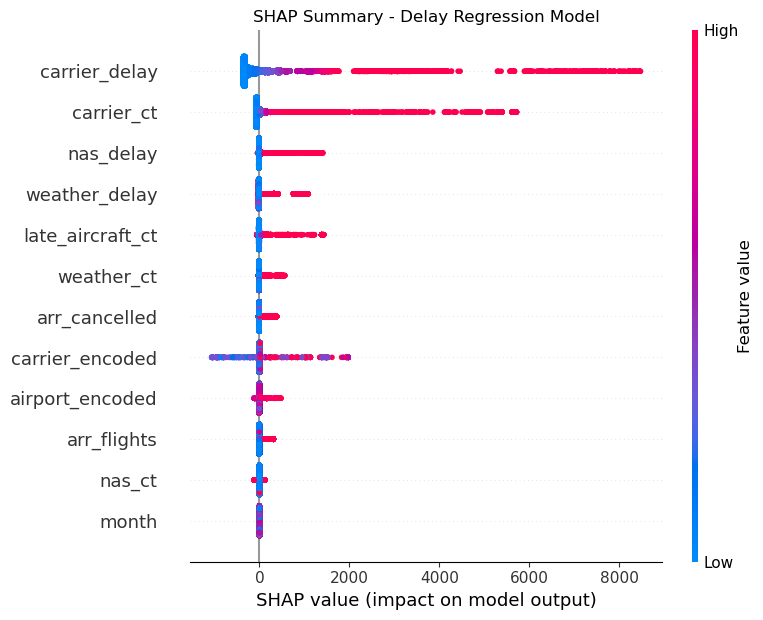

/var/folders/pq/590wdxhn5y555rym6t4k1km80000gn/T/ipykernel_6150/1231697733.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


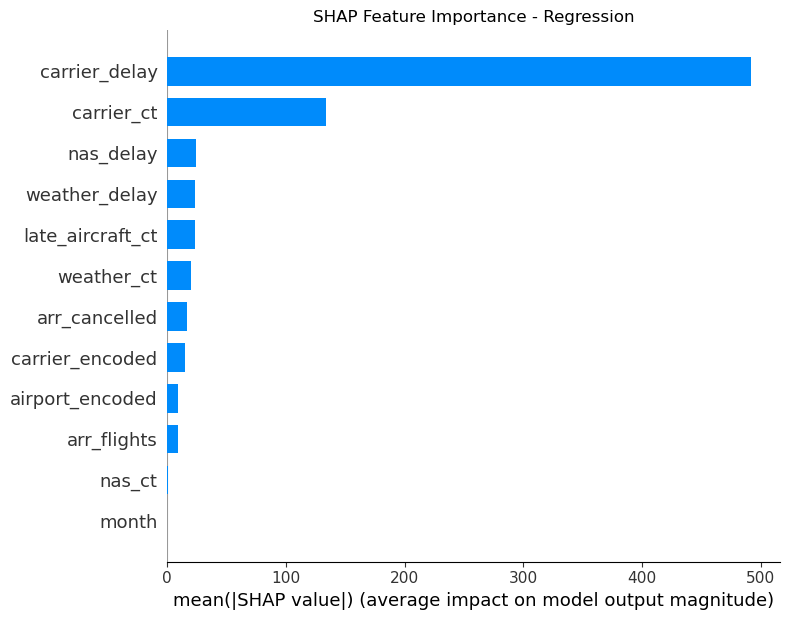

In [30]:
import shap

explainer_reg = shap.Explainer(reg_model, X_train_reg)  # Use training data as background
shap_values_reg = explainer_reg(X_test_reg)  # SHAP values for the test set

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_reg, X_test_reg, feature_names=X_test_reg.columns, show=False)
plt.title('SHAP Summary - Delay Regression Model')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_reg, X_test_reg, feature_names=X_test_reg.columns, plot_type="bar", show=False)
plt.title('SHAP Feature Importance - Regression')
plt.tight_layout()
plt.show()


#  Predicting Flight Delay Minutes
How it works:
	•	For each flight in our test set, we first predict if it will be delayed.
	•	If delayed, we estimate the number of delay minutes using the regression model.
	•	The final result is a new column, `predicted_delay_minutes`, which contains the estimated delay for each flight
This method provides actionable insights for airline operations, helping prioritize interventions for flights at risk of significant delays.
    

In [31]:
def predict_flight_delay(input_df, clf_model, reg_model):
 
    features = [
        'month',
        'arr_flights',
        'carrier_ct',
        'weather_ct',
        'nas_ct',
        'late_aircraft_ct',
        'arr_cancelled',
        'carrier_delay',
        'weather_delay',
        'nas_delay',
        'carrier_encoded',
        'airport_encoded',
    ]

    # Classification prediction
    clf_preds = clf_model.predict(input_df[features])


    final_predictions = []

    for idx, is_delayed in enumerate(clf_preds):
        if is_delayed == 1:
            reg_input = input_df.iloc[[idx]][features] 
            delay_minutes = reg_model.predict(reg_input)[0]
            final_predictions.append(delay_minutes)
        else:
            final_predictions.append(0.0)

    return np.round(final_predictions, 2)  
    
# predicted_delay_minutes =  predict_flight_delay(test_data, clf_model, reg_model)
# results_df = test_data.copy()
# esults_df['predicted_delay_minutes'] = predicted_delay_minutes

# print(results_df[['predicted_delay_minutes']].head())



    
'''To find out how many minutes the next flight will be delayed, simply remove the `#` symbols at the beginning of each line
to activate the code & upload the dataset in  "predict_flight_delay" function '''

'To find out how many minutes the next flight will be delayed, simply remove the `#` symbols at the beginning of each line\nto activate the code & upload the dataset in  "predict_flight_delay" function '